# Final Project, Wine Quality analysis for Red Wine


## Introduction


In this project, I seek to analyze several features of Vinho Verde wine to see how it affects the quality of the wine.

This data source was gathered from a 2009 survey of different red and white wines from Northern Portugal, though this project will only assess the red wine.

The features of this data source are.

*   Fixed Acidity
*   Volatile Acidity
* Citric Acid
* Residual Sugar
* Free Sulfur Dioxide
* Total Sulfur Dioxide
* Density
* pH Level
* Sulfates
* Alcohol Content

All of these features are numerical continuous values.

The target of this data source is the rated quality, rated on a scale from 3 to 8 using only integers.

By utilizing the information from this analysis, we can learn what features of a wine are most important for its quality. By doing this, winemakers can utilize this information to improve their wines to boost sales.

This can be used by both wine sellers and authorities for different purposes.

The original dataset can be found [here](https://archive.ics.uci.edu/dataset/186/wine+quality).

## Model Goal
In this project, we seek to utilize the data to be able to predict the quality of a red wine based on its features.

To do this, we will use a classification model because while it will lose the order of the placements, it will be able to take the discrete quality variables and show the requirements more effectively for each category, and show what feature variables are the most important.

This can also be more effective for authorities in detecting changes in quality. In the EU where the wine is made, authorities frequently have strong protections for local products, such as Champagne and Parmigiano Reggiano having protected status.

By being able to do quick quality test of products, it would be able to detect if a product is subpar, making an easy test for authorities to detect counterfeit products.

This will be done in 4 parts:
1. Analyze the basic data of the features
2. Compare the feature's data distribution to the quality
3. Build models to classify the data based on their features into quality.
4. Analyze the models to see what can be focused and improved upon.

In [155]:
###### Set Up #####
# verify our folder with the data and module assets is installed
# if it is installed make sure it is the latest
!test -e ds-assets && cd ds-assets && git pull && cd ..
# if it is not installed clone it
!test ! -e ds-assets && git clone https://github.com/IndraniMandal/ds-assets.git
# point to the folder with the assets
home = "ds-assets/assets/"
import sys
sys.path.append(home)      # add home folder to module search path

Already up to date.


In [156]:
import pandas as pd

from sklearn import tree

from treeviz import tree_print

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt  # visualization library
from sklearn.tree import plot_tree

In [157]:
import seaborn as sns
sns.set()

In [158]:
final_df=pd.read_csv("winequality-red.csv")
final_df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [159]:
features_df=final_df.drop('quality',axis=1)



In [160]:
target_df=final_df['quality']


## Preprocessed data
As shown below, there are 11 features and 1 target leading to 12 columns, with a total of 1599 entries/rows.

From initial appearances of the statistics, many of these values have standard deviations that are small compared to their mean.

Since the volatile and fixed acidity, density, pH level, sulfates, and alcohol have standard deviations less than half the mean, we can expect these to have values closer to the mean.

We also no that no data is missing from testing for missing values.

In [161]:
final_df.shape

(1599, 12)

In [162]:
final_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [163]:
final_df.isnull().values.sum()

0

## Initial Charts
As seen below, the values in this dataset are, in general, unimodal. While volatile acidity is bimodal, the modes are so close together that they can almost be treated as unimodal, with more clarified below.

<Axes: xlabel='quality', ylabel='count'>

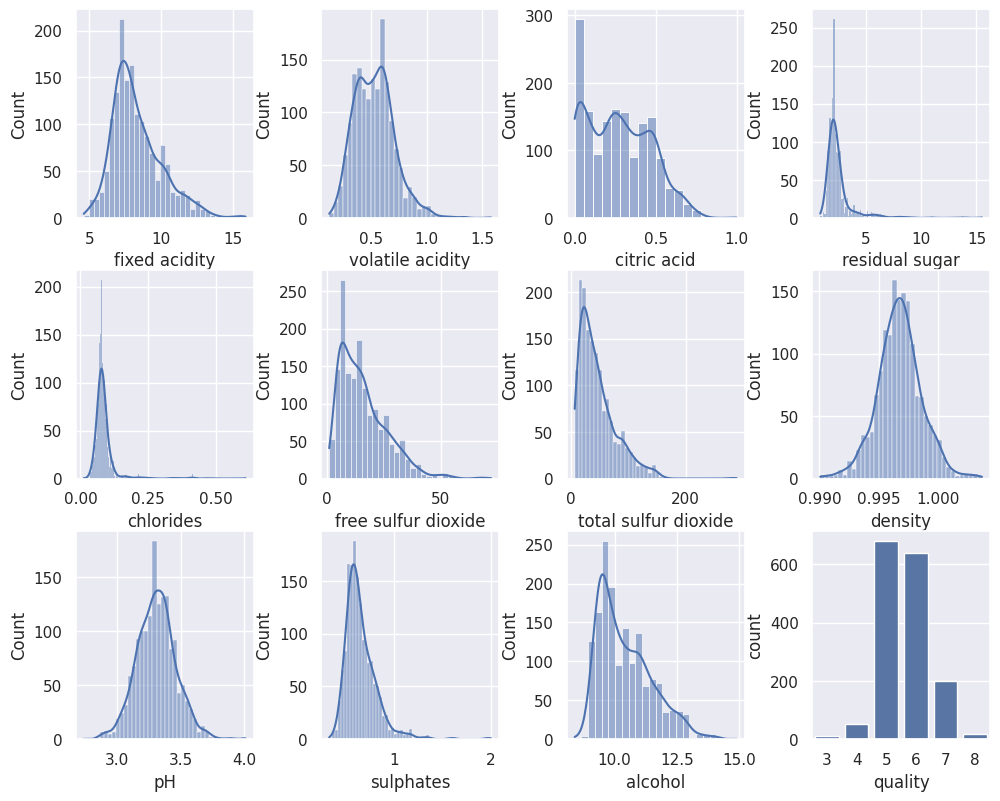

In [164]:
fig,axis=plt.subplots(3,4,figsize=(10,8))
fig.tight_layout()
sns.histplot(data=final_df["fixed acidity"],kde=True,ax=axis[0,0])
sns.histplot(data=final_df["volatile acidity"],kde=True,ax=axis[0,1])
sns.histplot(data=final_df["citric acid"],kde=True,ax=axis[0,2])
sns.histplot(data=final_df["residual sugar"],kde=True,ax=axis[0,3])
sns.histplot(data=final_df["chlorides"],kde=True,ax=axis[1,0])
sns.histplot(data=final_df["free sulfur dioxide"],kde=True,ax=axis[1,1])
sns.histplot(data=final_df["total sulfur dioxide"],kde=True,ax=axis[1,2])
sns.histplot(data=final_df["density"],kde=True,ax=axis[1,3])
sns.histplot(data=final_df["pH"],kde=True,ax=axis[2,0])
sns.histplot(data=final_df["sulphates"],kde=True,ax=axis[2,1])
sns.histplot(data=final_df["alcohol"],kde=True,ax=axis[2,2])
sns.barplot(data=final_df['quality'].value_counts(),ax=axis[2,3])

As we can see above, most of the data points are unimodal, with exception to volatile acidity and citric acid. Volatile acidity has a bimodal distribution so close it is almost unimodal with no skewing, but citric acid is, for lack of a better word, trimodal and being left-skewed.

Density and pH levels are both unimodal with no skew, and the rest of the histograms are unimodal with a right skew.

The bar chart for quality shows how while there are values between 3 and 8, the vast majority are between 4 and 7 with few 8's or 3's, which may induce bias in any models we create, however further analysis of boxplots will show how we can avoid this issue.


# Analysis

## Comparative Graphs
In this section, we seek to show how the target, quality, has different feature distribution for each category. To do this, several boxplots will be used which will allow each quality's distribution to be compared to other qualities to find a pattern.

<Axes: xlabel='alcohol'>

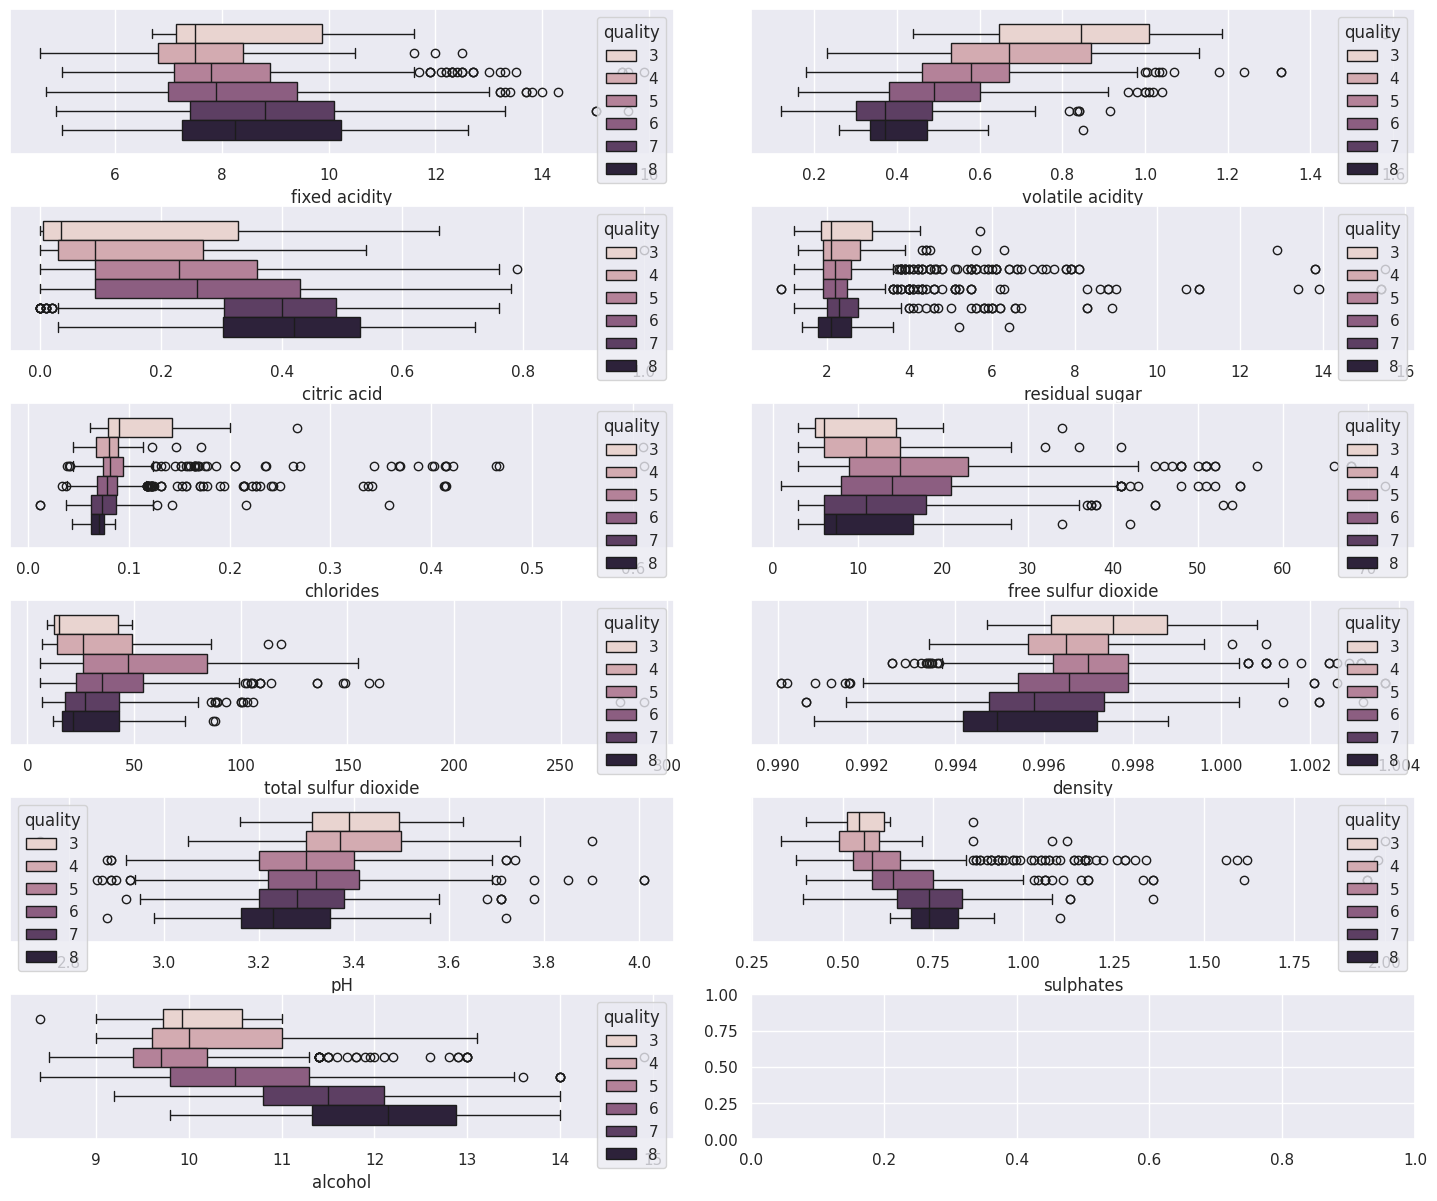

In [165]:
fig,axis=plt.subplots(6,2,figsize=(15,12))
fig.tight_layout()
sns.boxplot(data=final_df,x='fixed acidity',hue='quality',ax=axis[0,0])
sns.boxplot(data=final_df,x='volatile acidity',hue='quality',ax=axis[0,1])
sns.boxplot(data=final_df,x='citric acid',hue='quality',ax=axis[1,0])
sns.boxplot(data=final_df,x='residual sugar',hue='quality',ax=axis[1,1])
sns.boxplot(data=final_df,x='chlorides',hue='quality',ax=axis[2,0])
sns.boxplot(data=final_df,x='free sulfur dioxide',hue='quality',ax=axis[2,1])
sns.boxplot(data=final_df,x='total sulfur dioxide',hue='quality',ax=axis[3,0])
sns.boxplot(data=final_df,x='density',hue='quality',ax=axis[3,1])
sns.boxplot(data=final_df,x='pH',hue='quality',ax=axis[4,0])
sns.boxplot(data=final_df,x='sulphates',hue='quality',ax=axis[4,1])
sns.boxplot(data=final_df,x='alcohol',hue='quality',ax=axis[5,0])

As we can see above, some features are more correlated with quality than others. Alcohol levels, volatile acidity, and citric acid amounts seem to be the most correlated values,  but other values show differences as well.

Sulphates, density, pH levels, and chlorides appear to have a weaker linear correlation, while total and free sulfur dioxide seem to follow a bell curve.

Residual sugar seems to have the least effect as well, having relatively little difference.

Because of this, we would expect the decision tree to occur in this order where the most correlated features are tested first before moving onto the less correlated features.



## Basic Model

For the first analysis, we constructed a best decision tree. This will give allow us to test mutliple variations of decision trees and find one that hold the best results for this analysis.

This will not be the best possible model, but will be a good jumping off point for additional analysis. To accomplish this, we will be combining cross validation with a grid search to find the proper tree.

In order to both test and train the data, the data will be split with 80% of the data being used for training and 20 percent of the data being used for testing.

In [166]:
X_train, X_test, y_train, y_test = train_test_split(features_df, target_df, test_size=0.2, shuffle=True, random_state=42)
def classification_confint(acc, n):
    '''
    Compute the 95% confidence interval for a classification problem.
      acc -- classification accuracy
      n   -- number of observations used to compute the accuracy
    Returns a tuple (lb,ub)
    '''
    import math
    interval = 1.96*math.sqrt(acc*(1-acc)/n)
    lb = max(0, acc - interval)
    ub = min(1.0, acc + interval)
    return (lb,ub)

In [167]:
# Grid search with cross-validation for wisconsin breast cancer dataset
from sklearn.model_selection import GridSearchCV

# do the 5-fold cross validation and shuffle the data
cv = KFold(n_splits=5,  shuffle = True)

# setting up grid search
model = tree.DecisionTreeClassifier()
param_grid = {
    'max_depth': list(range(1,11)), # search 1..10
    'criterion': ['entropy', 'gini']
    }
grid = GridSearchCV(model, param_grid, cv=5)

# performing grid search
grid.fit(X_train, y_train)

# print out what we found
print("Best parameters: {}".format(grid.best_params_))

Best parameters: {'criterion': 'entropy', 'max_depth': 5}


In this grid search with cross validation, we tested the best tree baseed on criterion and depth along with having 5-fold cross validation along with data shuffling to improve the results.

In [168]:
# do the 5-fold cross validation and shuffle the data


# set up the model
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)

# do the 5-fold cross validation
scores = cross_val_score(dtree, X_train, y_train,cv=cv)
print("Fold Accuracies: {}".format(scores))
lb,ub = classification_confint(scores.mean(),final_df.shape[0])
print("Accuracy: {:3.3f} ({:3.3f},{:3.3f})".format(scores.mean(),lb,ub))
from sklearn.metrics import confusion_matrix
pred_test = grid.best_estimator_.predict(X_test)
# build and print the confusion matrix
labels = ['3','4','5','6','7','8']


Fold Accuracies: [0.60 0.58 0.61 0.62 0.55]
Accuracy: 0.591 (0.567,0.615)


As shown above, this tree was not that accurate. The tree hovered between had an accuracy of 59% with a confidence interval betwee 57-61%. Due to this low acccuracy, changes are needed to the model in order to increase the accuracy.

In order to do this, an improved model is needed.

## Improved Models

In order to improve the prediction of the classification, a better decision tree model is needed. The two that we will test here are the random forest model, and logistic regression

In [169]:
def balanced_accuracy_score(model, X_train, X_test, y_train):
  from sklearn.metrics import balanced_accuracy_score

  model.fit(X_train, y_train)
  # Prediction using Testing data
  pred_test = model.predict(X_test)
  #calculate the balanced accuracy by comparing the true testing target and the predicted values
  return balanced_accuracy_score(y_test, pred_test)

### Logistic regression

In [170]:
from sklearn.model_selection import KFold, cross_val_score
#From the model selection library import logistic regression
from sklearn.linear_model import LogisticRegression

# do the 5-fold cross validation and shuffle the data
cv = KFold(n_splits=5,  shuffle = True)

#models is a logistic regression model
lr=LogisticRegression(random_state=0, max_iter=10000) #maximum iteration is set to a high value of 10,000

scores = cross_val_score(lr, X_train, y_train,cv=cv)

print("Fold Accuracies: {}".format(scores))
lr_mean_score=scores.mean()
lr_balanced_acc=balanced_accuracy_score(lr, X_train, X_test, y_train)
lb,ub = classification_confint(scores.mean(),final_df.shape[0])
print("Accuracy: {:3.3f} ({:3.3f},{:3.3f})".format(scores.mean(),lb,ub))

Fold Accuracies: [0.62 0.62 0.61 0.59 0.58]
Accuracy: 0.604 (0.580,0.628)


The logistic regression model is better, with a confidence interval between 58-63% but with only an average 61% accuracy, a better model may be needed.

### Random Forest

In [171]:

from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


def balanced_accuracy_score(model, X_train, X_test, y_train):
  from sklearn.metrics import balanced_accuracy_score

  model.fit(X_train, y_train)
  # Prediction using Testing data
  pred_test = model.predict(X_test)
  #calculate the balanced accuracy by comparing the true testing target and the predicted values
  return balanced_accuracy_score(y_test, pred_test)
cv = KFold(n_splits=5,  shuffle = True)

rf = RandomForestClassifier(random_state=42)

scores = cross_val_score(rf, X_train, y_train,cv=cv)

print("Fold Accuracies: {}".format(scores))

rf_mean_score=scores.mean()
rf_balanced_acc=balanced_accuracy_score(rf, X_train, X_test, y_train)
lb,ub = classification_confint(scores.mean(),final_df.shape[0])
pred_test2=rf.predict(X_train)
print("Accuracy: {:3.3f} ({:3.3f},{:3.3f})".format(scores.mean(),lb,ub))

Fold Accuracies: [0.66 0.71 0.68 0.68 0.70]
Accuracy: 0.686 (0.664,0.709)


While still not entirely accurate, this decision tree has the highest mean accuracy at around 69% and confidence between 67-71%. This makes the random forest tree the most effective, and we will be able to see why through further analysis.

## Model Interpretation

In this analysis, we are comparing the best decision tree to the random forest tree to see what difference in valuation caused the accuracies to vary so widely.

### Best Decision Tree

[Text(0.5, 0.875, 'alcohol <= 10.525\nentropy = 1.706\nsamples = 1279\nvalue = [9, 43, 551, 506, 157, 13]\nclass = 5'),
 Text(0.25, 0.625, 'sulphates <= 0.575\nentropy = 1.398\nsamples = 786\nvalue = [6, 27, 465, 256, 30, 2]\nclass = 5'),
 Text(0.125, 0.375, 'total sulfur dioxide <= 98.5\nentropy = 1.217\nsamples = 314\nvalue = [4, 20, 225, 61, 4, 0]\nclass = 5'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'total sulfur dioxide <= 81.5\nentropy = 1.41\nsamples = 472\nvalue = [2, 7, 240, 195, 26, 2]\nclass = 5'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'sulphates <= 0.585\nentropy = 1.768\nsamples = 493\nvalue = [3, 16, 86, 250, 127, 11]\nclass = 6'),
 Text(0.625, 0.375, 'alcohol <= 11.05\nentropy = 1.846\nsamples = 127\nvalue = [3, 13, 41, 57, 13, 0]\nclass = 6'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'alcohol <= 11.

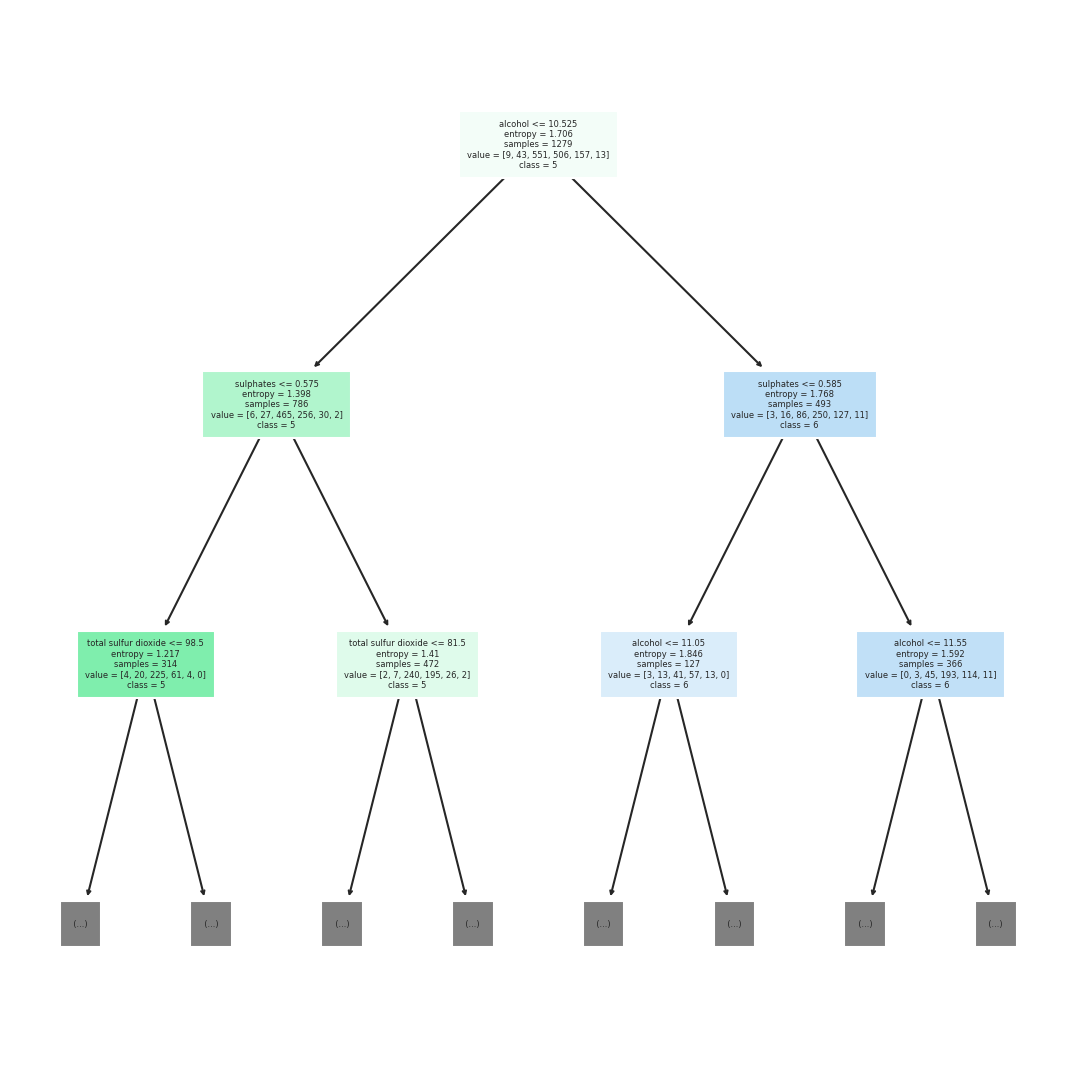

In [172]:
import matplotlib.pyplot as plt  # visualization library
from sklearn.tree import plot_tree
fig, axes = plt.subplots(1, 1, figsize=(9,9), dpi=150)
plot_tree(grid.best_estimator_, fontsize=4, filled=True,
               max_depth=2,
               feature_names= features_df.columns,
               class_names= ['3','4','5','6','7','8'])

As we can see above, the best decision tree focuses on 3 features, alcohol content, sulphate content, and total sulfur dioxide as the first questions the model asks of the data.

### Random Forest Tree

[Text(0.5, 0.875, 'sulphates <= 0.585\ngini = 0.646\nsamples = 820\nvalue = [7, 40, 509, 537, 172, 14]\nclass = 6'),
 Text(0.25, 0.625, 'density <= 0.995\ngini = 0.542\nsamples = 297\nvalue = [6, 31, 283, 119, 18, 0]\nclass = 5'),
 Text(0.125, 0.375, 'volatile acidity <= 0.805\ngini = 0.676\nsamples = 48\nvalue = [5, 6, 21, 39, 10, 0]\nclass = 6'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'alcohol <= 9.533\ngini = 0.464\nsamples = 249\nvalue = [1, 25, 262, 80, 8, 0]\nclass = 5'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'total sulfur dioxide <= 81.5\ngini = 0.63\nsamples = 523\nvalue = [1, 9, 226, 418, 154, 14]\nclass = 6'),
 Text(0.625, 0.375, 'total sulfur dioxide <= 47.5\ngini = 0.607\nsamples = 465\nvalue = [1, 6, 171, 407, 144, 12]\nclass = 6'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'volatile acidity <= 0.3\ngi

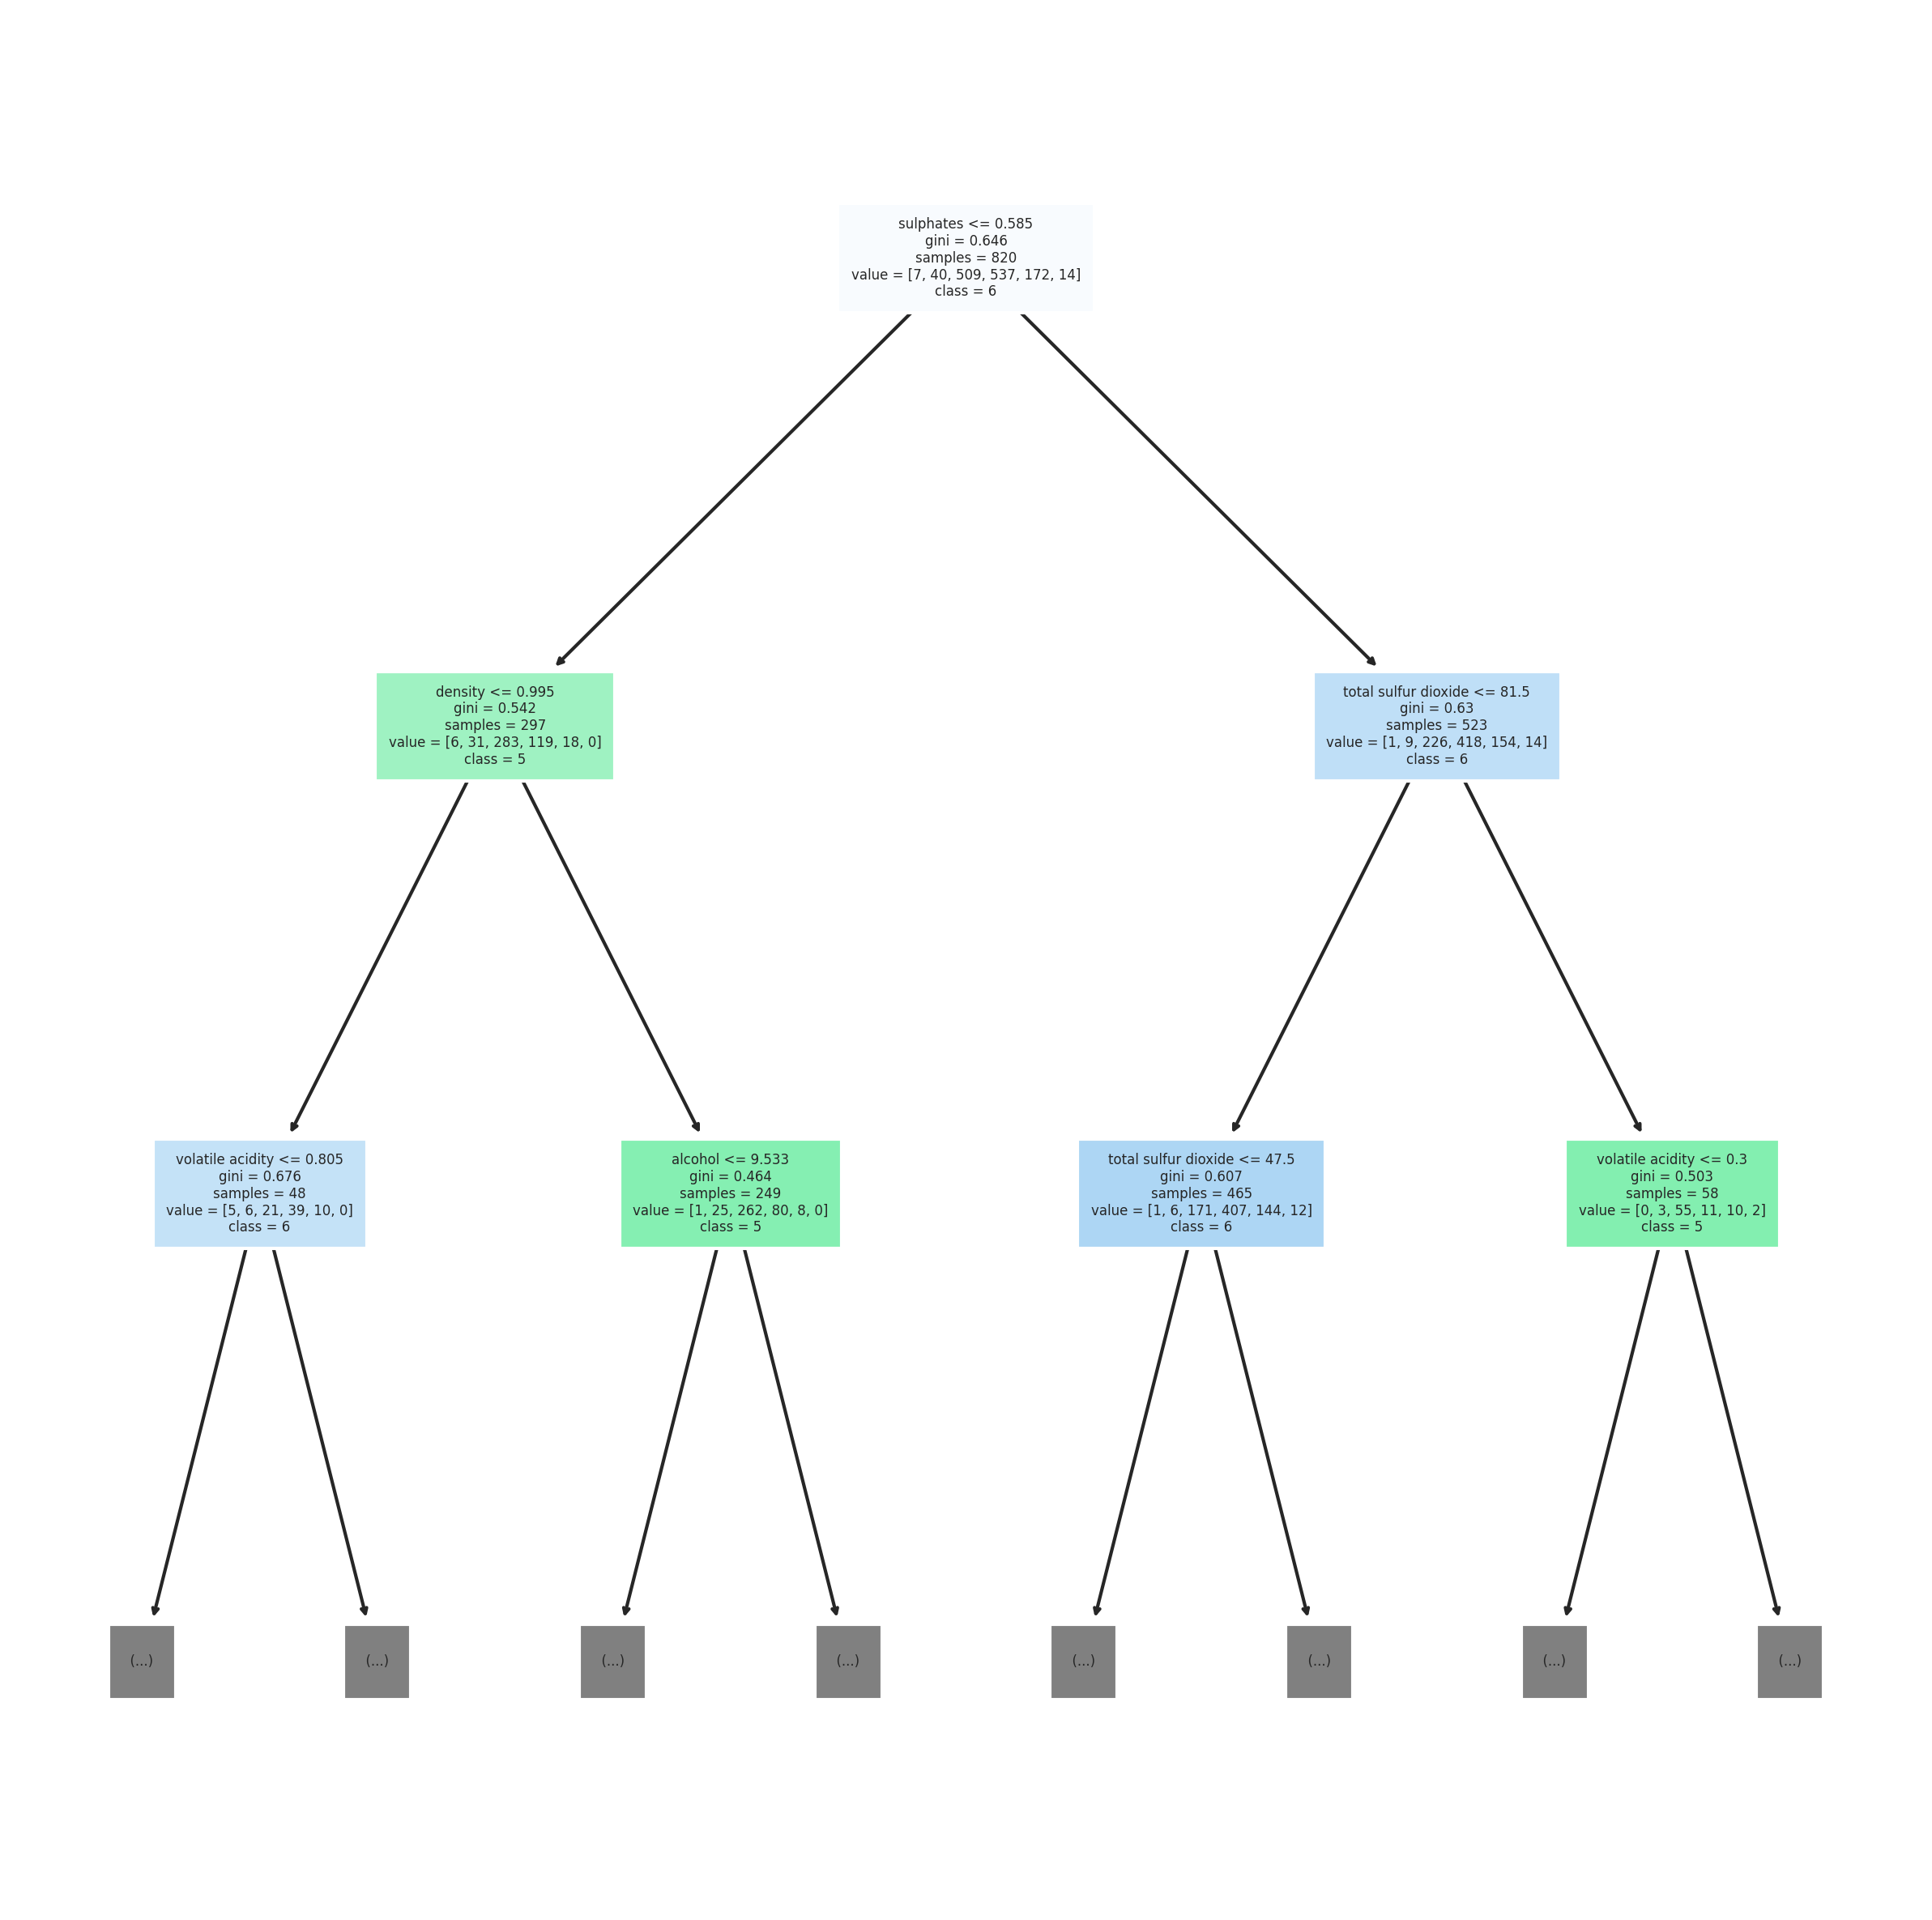

In [173]:
import matplotlib.pyplot as plt  # visualization library
from sklearn.tree import plot_tree

fig, axes = plt.subplots(1, 1, figsize=(10, 10), dpi=300)

plot_tree(decision_tree = rf.estimators_[0],
          fontsize=4, filled=True,
          max_depth=2,
          feature_names=features_df.columns,
          class_names=['3','4','5','6','7','8'])

The random forest tree has more features being used, density and volatile acidity being more important and alcohol being a much less important feature in the tree.

# Conclusions

Overall, while good data was gathered from this project, several issues occured in the analysis. The first issue and likely most insurmountable issue is that we are attempting to make a definitive classifier for what is essentially people's opinions.

People's tastes are notorious for varying, and because of this many features had wide and overlapping quartiles as seen in the box plots.

This was especially notable with the distribution, with few people selecting 3, 4 or 8 as quality.

The second issue was survey size, with only 1599 respondants, the data was left with a relatively large confidence interval in its already low accuracy.

The third issue, may have been my choice of analysis. While I chose classification because the dataset used discrete integer values, a regression may have been more appropriate.

Overall though, the classifier is able to predict the quality of a wine around 69% of the time allowing which can be a quick test of quality along with analyzing the most important features of the wine.